In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nrows = None

names = ["username", "gameid", "userrating", "own", "prevowned", "fortrade", "want", 
         "wanttoplay", "wanttobuy", "wishlist", "wishlistpriority", "preordered", 
         "numplays", "lastmodified"]

data = pd.read_csv("../data/userinfo.csv", nrows=nrows, names=names)

In [3]:
print(f"Records:      {len(data.index):,.0f}")
print(f"Unique users: {len(data.username.unique()):,.0f}")
print(f"Unique games: {len(data.gameid.unique()):,.0f}")

Records:      7,713,598
Unique users: 31,541
Unique games: 62,643


# Users

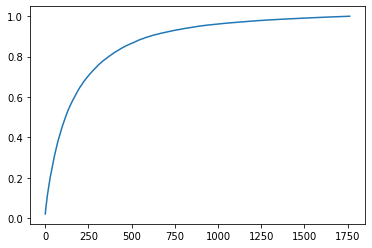

In [4]:
total_users = len(data.username.unique())

data\
    .groupby("username", as_index=False)["gameid"]\
    .count()\
    .rename({"gameid": "gamecount"}, axis="columns")\
    .sort_values("gamecount", ascending=False)\
    .groupby("gamecount", as_index=False)["username"]\
    .count()\
    .assign(prop_users=lambda row: row["username"] / total_users)\
    .prop_users\
    .cumsum()\
    .plot()

In [6]:
gamenames = ["gameid", "primaryname", "yearpublished", "gamerank", "usersrated", "average"]

games = data = pd.read_csv("../data/gamesinfo.csv", 
                           nrows=None, 
                           names=gamenames, 
                           usecols=[0,1,2,3,4,5])

In [23]:
games["gamerank"] = games.gamerank.apply(lambda x: 0 if x == "Not Ranked" else int(x))

In [38]:
import statsmodel

ModuleNotFoundError: No module named 'statsmodel'

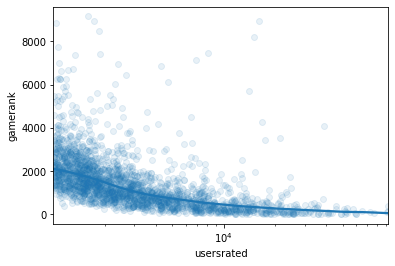

In [42]:
f, ax = plt.subplots(1, 1)
sns.regplot(x="usersrated", 
                y="gamerank", 
                data=games\
                .query("gamerank > 0")\
                .query("gamerank < 10000")\
                .query("usersrated > 1000"), 
                ax=ax, lowess=True, scatter_kws={"alpha": 0.1})
ax.set_xscale("log")


In [19]:
games.dtypes

gameid             int64
primaryname       object
yearpublished    float64
gamerank          object
usersrated         int64
average          float64
dtype: object